In [45]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [61]:
freq = np.array([10, 50, 250, 1000, 5000, 10000, 50000])
V_L = np.array([0.264, 0.288, 0.612, 2.00, 3.86, 4.03, 4.08])
V_o = np.array([3.88, 3.88, 3.90, 3.92, 4.04, 4.06, 4.06])
shift = np.array([-4.90, -22.0, -57.0, -54.0, -18.0, -8.0, 3.0])
theoret_shift = np.array([1e-4, 5e-4, 0.025, 0.1, 0.5, 1, 5])
VL_Vo = V_L / V_o


In [55]:
def fit_model(x, A, tau):
    denom = (1 + x ** 2 * tau ** 2) ** 0.5
    return (A * x * tau) / denom


In [56]:
pars, cov = opt.curve_fit(fit_model, freq, VL_Vo)

A, tau = pars
A_err, tau_err = np.sqrt(np.diag(cov))

y_pred = fit_model(np.logspace(0, 5), A, tau)


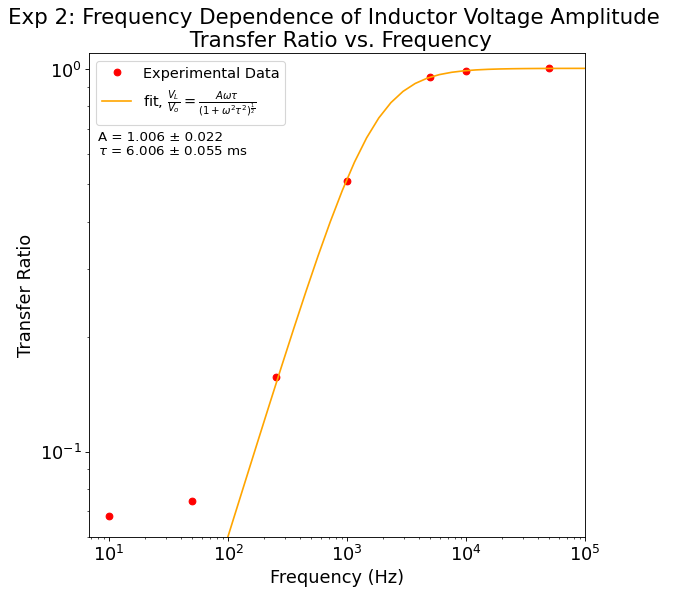

In [58]:
# Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

# Data and fit
plt.loglog(freq, VL_Vo, 'ro', label='Experimental Data')
plt.loglog(np.logspace(0, 5), y_pred, color='orange', label=r'fit, $\frac{V_L}{V_o}=\frac{A\omega\tau}{(1+\omega^2\tau^2)^\frac{1}{2}}$')

# Axes label and title
plt.title("Exp 2: Frequency Dependence of Inductor Voltage Amplitude \n Transfer Ratio vs. Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Transfer Ratio")
plt.legend(loc='upper left', prop={'size': 13})
plt.text(8, .65, "A = %5.3f \u00b1 %5.3f" %(A, A_err), fontsize=12)
plt.text(8, .6, r'$\tau$ '+"= 6.006 \u00b1 0.055 ms", fontsize=12)
plt.ylim(.06, 1.1)
plt.xlim(6.8, 1e5)
plt.show()


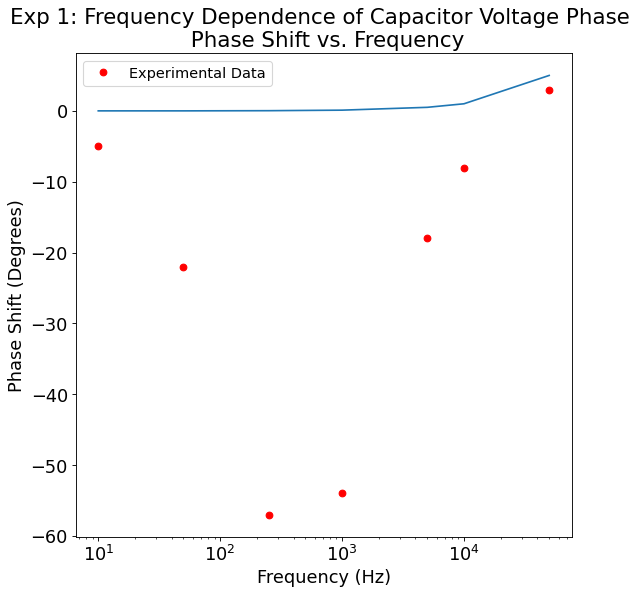

In [62]:
# Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

# Data and fit
plt.semilogx(freq, shift, 'ro', label='Experimental Data')
plt.plot(freq, theoret_shift)
# plt.plot(np.logspace(0, 4), y_pred, color='orange', label=r'fit, $\phi_c = \omega \tau$')

# Axes label and title
plt.title("Exp 1: Frequency Dependence of Capacitor Voltage Phase \n Phase Shift vs. Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase Shift (Degrees)")
plt.legend(loc='upper left', prop={'size': 13})
# plt.text(.8, 95, r'$\tau$ '+"= .011 \u00b1 0.004 s", fontsize=12)
plt.show()
